# Programming Assignment 1
## Wil Gaboury

In [1]:
# imports
import a_star
import pandas as pd
import plotnine as p9
import time

## Part 1: Exploring Search Algorithm

### 1. Randomly create a family of 30 TSP graphs/matrices for each size 5, 10, 15, 20, ...

In [2]:
def gen_graphs(n):
    result = []
    for i in range(30):
        result.append(a_star.TSPGraph.generate_random(n))
    return result

families = [
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8))
#     (10, gen_graphs(10)),
#     (12, gen_graphs(12))
]

### 1. Run the above algorithms on each of the family of size 5, of size 10, etc....
### 2. For each family of 30 graphs/matrices you’ll compute the AVERAGE/MIN/MAX of totalcost, number of nodes, CPU and real-world runtime

In [3]:
def test_a_star(families, hs):
    df = pd.DataFrame(columns=['n', 'h', 'total_cost', 'node_count', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for h_name, h_func in hs.items():
            for graph in family:    
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = a_star.a_star(graph.get_start_state_node(), a_star.is_goal, h_func)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()

                df = df.append({
                    'n': graph_size,
                    'h': h_name,
                    'total_cost': sum(list(search_result[0].path)),
                    'node_count': search_result[1], 
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64', 'node_count': 'int64'})
    return df

In [4]:
hs = {
    'uniform_cost': a_star.h_uniform_cost,
    'random_edge': a_star.h_random_edge,
    'smallest_edge': a_star.h_smallest_edge
}
df = test_a_star(families, hs)
df_summary = df.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost           node_count             cpu_time  \
                      mean min max         mean  min   max      mean   
n h                                                                    
4 random_edge     5.400000   3   6    15.433333    5    35  0.000236   
  smallest_edge   5.200000   3   6    20.300000   10    38  0.000350   
  uniform_cost    4.466667   3   6    20.466667    8    31  0.000219   
5 random_edge     9.100000   6  10    22.966667    6    51  0.000440   
  smallest_edge   8.933333   6  10    64.200000   20   120  0.001453   
  uniform_cost    8.300000   6  10    68.000000   26   139  0.000850   
6 random_edge    13.666667   6  15    25.200000    7    84  0.000596   
  smallest_edge  13.800000   6  15   144.700000   47   309  0.004627   
  uniform_cost   12.233333   6  15   160.233333   35   351  0.003910   
7 random_edge    20.266667  15  21    28.733333   10   101  0.000803   
  smallest_edge  19.700000  12  21   429.633333   82  1189  0.019323   
  uniform_cost   17.633333  10  21   695.200000  165  2054  0.012505   
8 random_edge    27.000000  23  28    33.333333   13    97  0.001095   
  smallest_edge  26.466667  16  28   830.500000   90  2958  0.049849   
  uniform_cost   25.133333  16  28  2053.300000  309  6032  0.050999   

                                    real_time                      
                      min       max      mean       min       max  
n h                                                                
4 random_edge    0.000097  0.000477  0.000236  0.000096  0.000481  
  smallest_edge  0.000210  0.000577  0.000350  0.000210  0.000576  
  uniform_cost   0.000099  0.000314  0.000219  0.000098  0.000318  
5 random_edge    0.000136  0.000881  0.000441  0.000135  0.000880  
  smallest_edge  0.000607  0.002382  0.001455  0.000606  0.002386  
  uniform_cost   0.000344  0.001630  0.000851  0.000344  0.001633  
6 random_edge    0.000191  0.001806  0.000597  0.000191  0.001810  
  smallest_edge  0.001704  0.009296  0.004633  0.001708  0.009305  
  uniform_cost   0.000561  0.046836  0.003915  0.000561  0.046933  
7 random_edge    0.000299  0.002671  0.000804  0.000299  0.002675  
  smallest_edge  0.004539  0.052082  0.019349  0.004546  0.052187  
  uniform_cost   0.002974  0.035822  0.012526  0.002978  0.035879  
8 random_edge    0.000432  0.002955  0.001097  0.000432  0.002959  
  smallest_edge  0.007376  0.182400  0.049936  0.007382  0.182689  
  uniform_cost   0.006042  0.160566  0.051072  0.006046  0.160813

In [5]:
df_plot = df.groupby(['n', 'h']).agg('mean')

# fixing the nested columns
df_plot.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

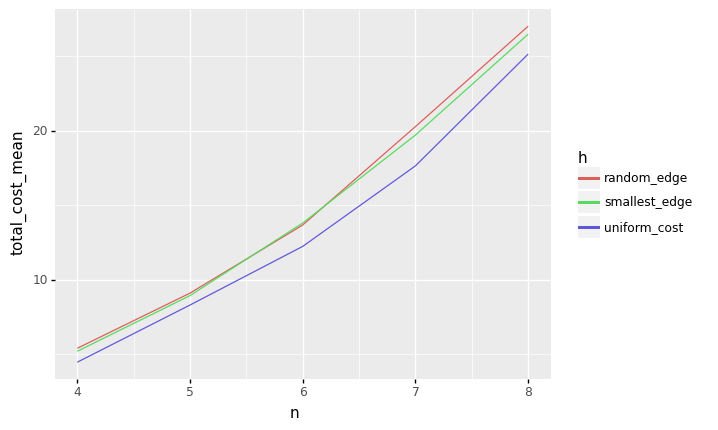

<ggplot: (8752162980220)>

In [6]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='h'))
        + p9.geom_line()
)

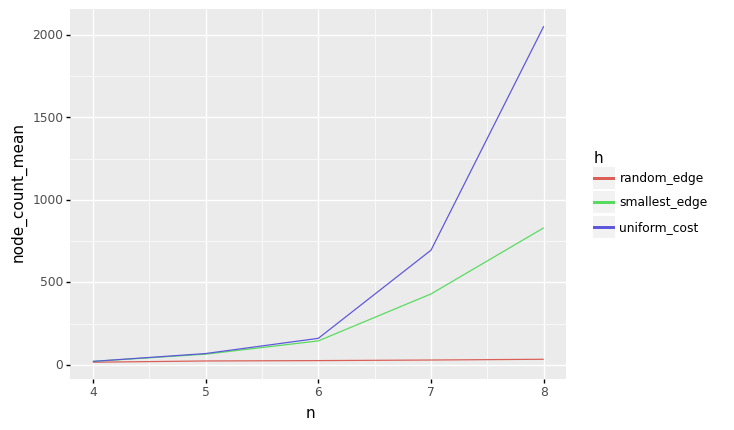

<ggplot: (8752162980133)>

In [7]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='node_count_mean', color='h'))
        + p9.geom_line()
)

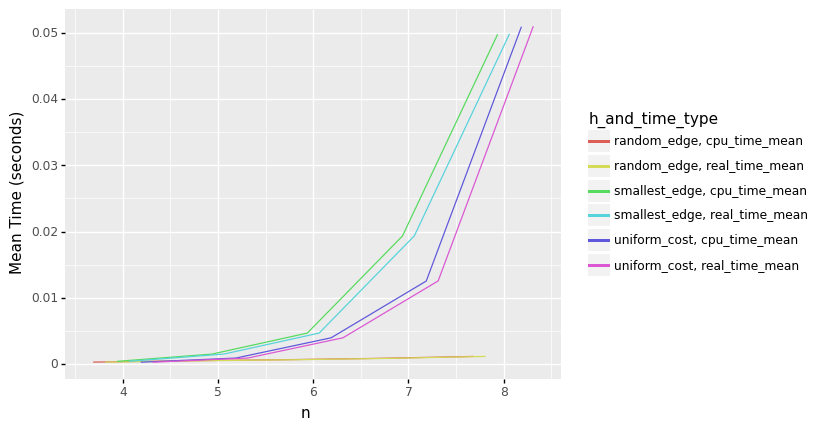

<ggplot: (8752163011133)>

In [8]:
df_time = df_plot.copy()
df_time = df_time[['n', 'h', 'cpu_time_mean', 'real_time_mean']]
df_time = pd.melt(df_time, id_vars=['n', 'h'], value_vars=['cpu_time_mean', 'real_time_mean'], 
        var_name='time_type', value_name='time_mean')
df_time['h_and_time_type'] = df_time['h'].str.cat(df_time['time_type'], sep=', ')
(
    p9.ggplot(df_time, p9.aes(x='n', y='time_mean', color='h_and_time_type'))
        + p9.geom_line(position=p9.position_dodge2(width=0.75))
        + p9.labs(y='Mean Time (seconds)')
)

The uniform cost search heuristic seemed to give the consistently lowest cost. This would make sense since it’s guaranteed to get the optimal outcome because it searches outward in every direction from the start node until it reaches the closest goal node. The difference in path length between all of the heuristics is small, with the maximum difference in my tests being around 10 when the size of the graph is 10. It seems that in general though the difference gets larger as n gets larger.

The heuristic with the least runtime by far is the random edge heuristic. The runtimes for each heuristic get larger as the graph size gets larger.

There is almost no difference on my computer between cpu and real world runtime. I can imagine if I was running another cpu intensive process on my computer at the same time there might have been a more significant difference.

## Part 2: Solve TSP with A* and MST Heuristic

In [9]:
hs = { 'mst': a_star.h_mst }
df_mst = test_a_star(families, hs)
df_mst_small = pd.concat([df[df['h'] == 'smallest_edge'], df_mst])

In [10]:
df_summary = df_mst_small.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost          node_count            cpu_time            \
                      mean min max        mean min   max      mean       min   
n h                                                                            
4 mst             5.400000   3   6   13.033333   5    22  0.000419  0.000186   
  smallest_edge   5.200000   3   6   20.300000  10    38  0.000350  0.000210   
5 mst             9.233333   6  10   26.033333   7    58  0.001045  0.000404   
  smallest_edge   8.933333   6  10   64.200000  20   120  0.001453  0.000607   
6 mst            14.300000  10  15   50.400000  17   116  0.002907  0.001213   
  smallest_edge  13.800000   6  15  144.700000  47   309  0.004627  0.001704   
7 mst            20.366667  17  21  110.966667  26   298  0.008036  0.002493   
  smallest_edge  19.700000  12  21  429.633333  82  1189  0.019323  0.004539   
8 mst            27.333333  19  28  179.333333  23   989  0.016994  0.003725   
  smallest_edge  26.466667  16  28  830.500000  90  2958  0.049849  0.007376   

                          real_time                      
                      max      mean       min       max  
n h                                                      
4 mst            0.000687  0.000417  0.000186  0.000686  
  smallest_edge  0.000577  0.000350  0.000210  0.000576  
5 mst            0.001946  0.001047  0.000409  0.001949  
  smallest_edge  0.002382  0.001455  0.000606  0.002386  
6 mst            0.005561  0.002916  0.001217  0.005627  
  smallest_edge  0.009296  0.004633  0.001708  0.009305  
7 mst            0.020265  0.008061  0.002500  0.020339  
  smallest_edge  0.052082  0.019349  0.004546  0.052187  
8 mst            0.069205  0.017043  0.003729  0.069447  
  smallest_edge  0.182400  0.049936  0.007382  0.182689

In [11]:
df_ratio = df_mst_small.groupby(['n', 'h']).agg('mean')
df_ratio.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_ratio = df_ratio.reset_index()

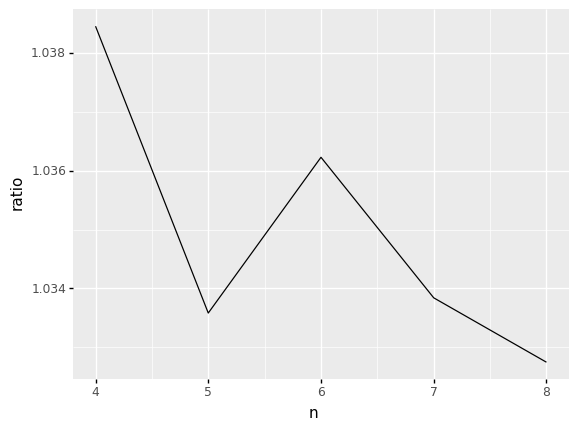

<ggplot: (8752162914976)>

In [12]:
df_cost = df_ratio[['n', 'h', 'total_cost_mean']]
df_cost = df_cost.pivot_table(index=['n'], columns='h', values='total_cost_mean')
df_cost = df_cost.reset_index()
df_cost['ratio'] = df_cost['mst'] / df_cost['smallest_edge']
(
    p9.ggplot(df_cost, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
)

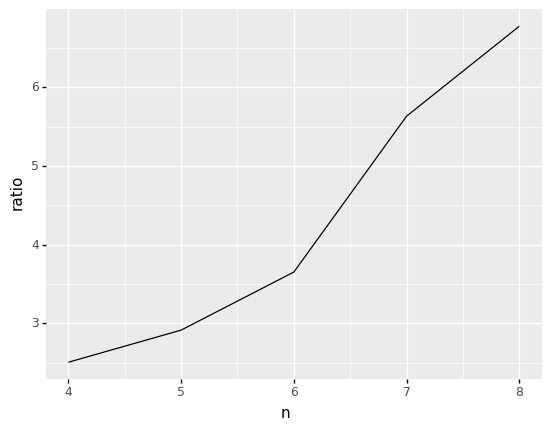

<ggplot: (8752162695626)>

In [13]:
df_count = df_ratio[['n', 'h', 'node_count_mean']]
df_count = df_count.pivot_table(index=['n'], columns='h', values='node_count_mean')
df_count = df_count.reset_index()
df_count['ratio'] = df_count['mst'] / df_cost['smallest_edge']
(
    p9.ggplot(df_count, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
)

In [14]:
#perform difference caluclations
df_diff = df.copy()
df_diff['test_num'] = df_diff.index % 30

df_diff = pd.melt(df_diff, id_vars=['n', 'h', 'test_num'], 
                  value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                  var_name='stat_type', value_name='stat_value')

df_mst_diff = df_mst.copy()
df_mst_diff['test_num'] = df_mst_diff.index % 30

df_mst_diff = pd.melt(df_mst_diff, id_vars=['n', 'h', 'test_num'], 
                      value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                      var_name='stat_type', value_name='stat_value')

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num', 'stat_type'], 
                        right_on=['n', 'test_num', 'stat_type'])

df_diff['diff'] = df_diff['stat_value_x'] - df_diff['stat_value_y']
df_diff = df_diff[['n', 'test_num', 'h_x', 'stat_type', 'diff']]
df_diff = df_diff.rename(columns={'h_x': 'h'})

df_diff = df_diff.pivot_table(index=['n', 'test_num', 'h'], columns='stat_type', values='diff')
df_diff = df_diff.reset_index()
del df_diff['test_num']
df_diff_summary = df_diff.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_diff_summary

cpu_time                       node_count                 \
                     mean       min       max         mean    min     max   
n h                                                                         
4 random_edge   -0.000182 -0.000462  0.000051     2.400000   -5.0    13.0   
  smallest_edge -0.000069 -0.000327  0.000091     7.266667    0.0    16.0   
  uniform_cost  -0.000200 -0.000482 -0.000047     7.433333   -3.0    18.0   
5 random_edge   -0.000605 -0.001170  0.000193    -3.066667  -22.0    25.0   
  smallest_edge  0.000408 -0.000423  0.001077    38.166667   -4.0    74.0   
  uniform_cost  -0.000195 -0.000808  0.000307    41.966667   -2.0    98.0   
6 random_edge   -0.002311 -0.004919 -0.000763   -25.200000  -95.0    45.0   
  smallest_edge  0.001720 -0.001492  0.006727    94.300000   -8.0   270.0   
  uniform_cost   0.001003 -0.003146  0.043737   109.833333  -11.0   295.0   
7 random_edge   -0.007232 -0.017594 -0.001965   -82.233333 -197.0     0.0   
  smallest_edge  0.011287 -0.000695  0.044612   318.666667   56.0   891.0   
  uniform_cost   0.004469 -0.008710  0.022373   584.233333  108.0  1756.0   
8 random_edge   -0.015899 -0.068320 -0.002221  -146.000000 -962.0    24.0   
  smallest_edge  0.032855 -0.000214  0.113195   651.166667   67.0  1969.0   
  uniform_cost   0.034006 -0.008281  0.137860  1873.966667  140.0  5807.0   

                real_time                     total_cost             
                     mean       min       max       mean   min  max  
n h                                                                  
4 random_edge   -0.000181 -0.000462  0.000051   0.000000  -2.0  3.0  
  smallest_edge -0.000067 -0.000326  0.000091  -0.200000  -3.0  1.0  
  uniform_cost  -0.000198 -0.000482 -0.000045  -0.933333  -3.0  0.0  
5 random_edge   -0.000606 -0.001173  0.000188  -0.133333  -4.0  2.0  
  smallest_edge  0.000408 -0.000423  0.001077  -0.300000  -4.0  0.0  
  uniform_cost  -0.000196 -0.000804  0.000312  -0.933333  -4.0  0.0  
6 random_edge   -0.002319 -0.004924 -0.000794  -0.633333  -6.0  3.0  
  smallest_edge  0.001717 -0.001493  0.006700  -0.500000  -4.0  0.0  
  uniform_cost   0.000999 -0.003212  0.043823  -2.066667  -9.0  0.0  
7 random_edge   -0.007257 -0.017664 -0.001972  -0.100000  -6.0  4.0  
  smallest_edge  0.011288 -0.000733  0.044704  -0.666667  -9.0  3.0  
  uniform_cost   0.004465 -0.008713  0.022430  -2.733333 -11.0  3.0  
8 random_edge   -0.015947 -0.068562 -0.002225  -0.333333  -5.0  6.0  
  smallest_edge  0.032892 -0.000255  0.113242  -0.866667  -7.0  0.0  
  uniform_cost   0.034028 -0.008330  0.138066  -2.200000  -7.0  0.0

The above is a table of the mean/min/max of the differences between each catagory in the original test and the values of the mst test

In [15]:
# prepping plot dataframe
df_plot = df_diff.groupby(['n', 'h']).agg(['mean'])
df_plot.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

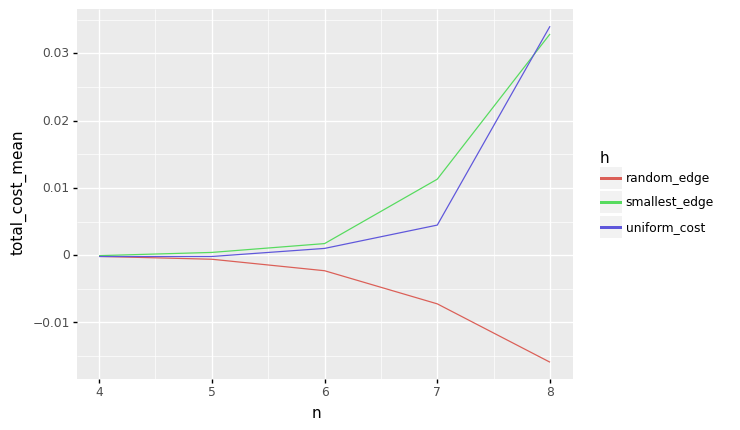

<ggplot: (8752162874218)>

In [16]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='h'))
        + p9.geom_line()
)

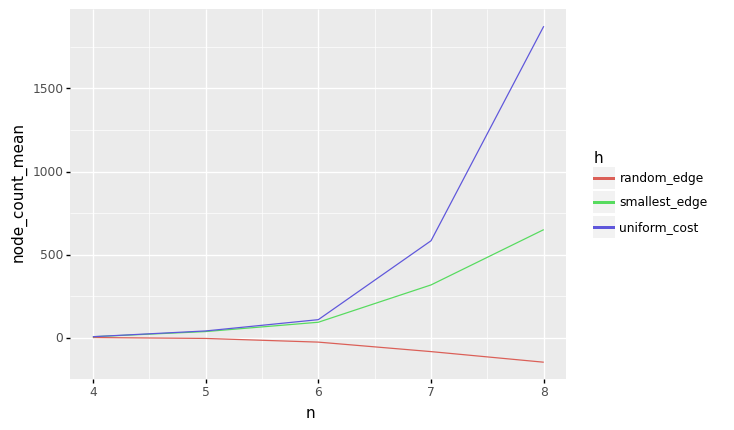

<ggplot: (8752162874164)>

In [17]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='node_count_mean', color='h'))
        + p9.geom_line()
)

## Part 3: Explore Local Search Algorithm